# NBAPositionify: Leveraging Data Mining Techniques to Classify Professional Basketball Players into Positions

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import kaggle
import matplotlib.pyplot as plt

In [2]:
## Get Dataset from Kaggle
# Requires the kaggle package to download dataset. Uncomment the line below to install
# !pip3 install kaggle
import kaggle
# Requires kaggle.json (Kaggle API Key) placed in ~/.kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files("drgilermo/nba-players-stats", path="./data/", unzip=True)

## Exploratory Data Analysis

Our data is from `basketball-reference.com`. Three datasets:

In [3]:
player_data = pd.read_csv("./data/player_data.csv")
player_data.head(1)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University


In [4]:
players = pd.read_csv("./data/Players.csv")
players.head(1)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN


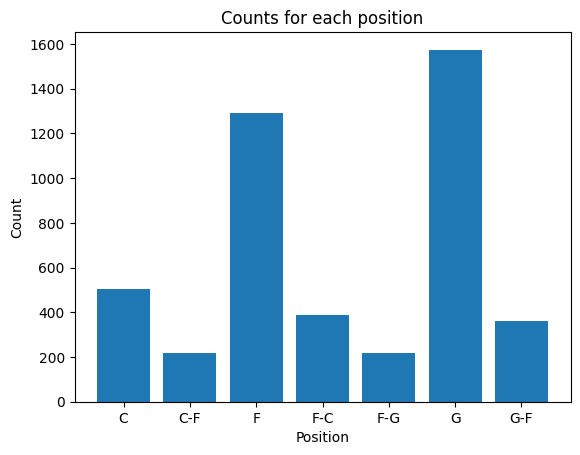

In [5]:
plt.bar(player_data.groupby('position').size().index, player_data.groupby('position').size().values)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Counts for each position')
plt.show()

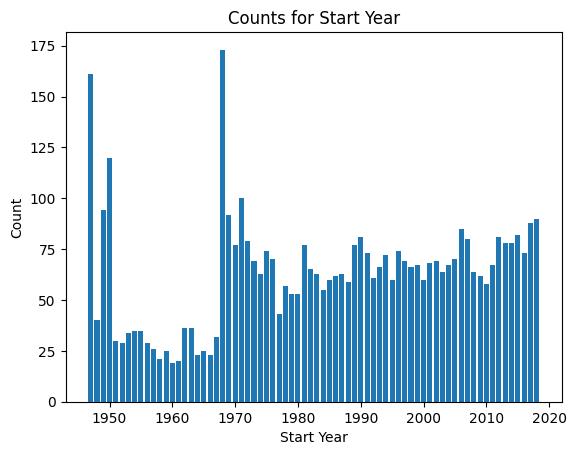

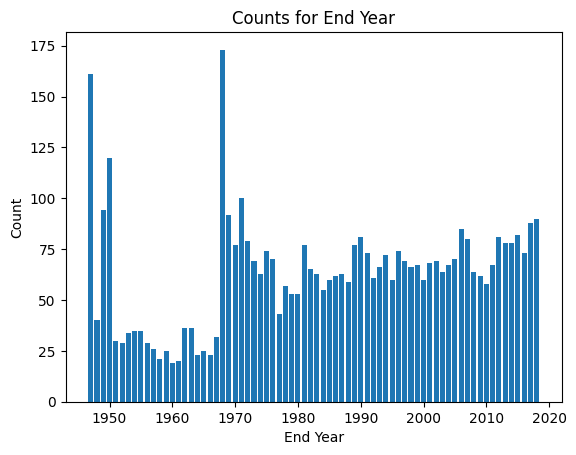

In [6]:
plt.bar(player_data.groupby('year_start').size().index, player_data.groupby('year_start').size().values)
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.title('Counts for Start Year')
plt.show()

plt.bar(player_data.groupby('year_start').size().index, player_data.groupby('year_start').size().values)
plt.xlabel('End Year')
plt.ylabel('Count')
plt.title('Counts for End Year')
plt.show()

In [25]:
stats = pd.read_csv("Seasons_Stats.csv")
stats = stats.rename(columns={"Unnamed: 0" : "Index"})
for index, row in stats.iterrows():
    if pd.isna(row["Pos"]):
        stats.at[index, "Pos"] = []
    else:
        stats.at[index, "Pos"] = row["Pos"].split("-")
stats.head()

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,"[G, F]",31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,[SG],29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,[SF],25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,[F],24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,[F],24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [8]:
player_rows = {}
for index, row in stats.iterrows():
    if row["Player"] not in player_rows:
        player_rows[row["Player"]] = []
    player_rows[row["Player"]].append(index)

In [27]:
for column in stats:
    print(column)

Index
Year
Player
Pos
Age
Tm
G
GS
MP
PER
TS%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
USG%
blanl
OWS
DWS
WS
WS/48
blank2
OBPM
DBPM
BPM
VORP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS


In [44]:
career_stats = pd.DataFrame(columns=["Years", "Player", "Pos", "Tms"])
for player in player_rows:
    new_row = {}
    sub_df = stats.loc[player_rows[player]]
    new_row["Years"] = [min(sub_df["Year"]), max(sub_df["Year"])]
    new_row["Player"] = player
    new_row["Pos"] = []
    for positions in sub_df["Pos"]:
        new_row["Pos"] += positions
    new_row["Pos"] = list(set(new_row["Pos"]))
    new_row["Tms"] = []
    for team in sub_df["Tm"]:
        if team not in new_row["Tms"]:
            new_row["Tms"].append(team)
    # TODO: Get summary of all other columns in sub_df to new_row
    career_stats = pd.concat([career_stats, pd.DataFrame([new_row])])
career_stats.head()

,Years,Player,Pos,Tms
0,"[1950.0, 1951.0]",Curly Armstrong,"[F, G]",[FTW]
0,"[1950.0, 1952.0]",Cliff Barker,[SG],[INO]
0,"[1950.0, 1954.0]",Leo Barnhorst,"[F, SF, G]","[CHS, INO, TOT]"
0,"[1950.0, 1951.0]",Ed Bartels,[F],"[TOT, DNN, NYK, WSC]"
0,"[1950.0, 1951.0]",Ralph Beard,[G],[INO]
